#### Marta Kałużna (290283)
# Numerical Optimization
## Problem set 1

### Problem 1.1     
In this problem you are going to solve the system of linear equations $Ax=b$, where $A\in \mathbb R^{n\times n}$, $b\in\mathbb R^n$ are given.

1. Implement the [Gauss elimination algorithm](https://www.wikiwand.com/en/Gaussian_elimination) that solves the system $Ax=b$. 
> `x = solve(A,b)`
2. Test your algorithm with built-in solver (see [`\`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\-Tuple{AbstractArray{T,2}%20where%20T,Union{AbstractArray{T,1},%20AbstractArray{T,2}}%20where%20T}) in Julia for example).<br/>
One can perform the tests by taking $b := Ax$ for somehow generated vector (solution) $x\in\mathbb R^n$.
3. Experiment with different kind of matrices $A$: symmetric, (2,3-)diagonal, Hilbert, positive definite, ..., 

**My solve function:**

In [81]:
import numpy as np

def solve(a, b, cut = False):
    a = a.astype(float)
    r, c = a.shape # number of rows, columns
    
    # if number of rows is greater than number of columns
    if r > c:
        cut = True
        a_pom = a[c:,:]
        a = a[:c,:]
        b_pom = b[c:]
        b = b[:c]
        r, c = a.shape
    
    a = np.c_[a,b]  # we add vector b to matrix A (as a column)
    
    # upper-triangle matrix
    for i in range(c-1):
        # to not divide by zero, we will swap rows of matrix A
        while a[i,i] == 0:
            a = a[np.random.permutation(np.arange(c)),:]
        for j in range(i+1, r):
            k = a[j,i]/a[i,i]
            a[j,:] = a[j,:] - k*a[i,:]
    
    # solution
    for i in range(c-1, -1, -1):
        a[i,:]= a[i,:]/a[i,i]
        for j in range(i-1, -1, -1):
            k = a[j,i]/a[i,i]
            a[j,:] = a[j,:] - k*a[i,:]

    # only if number of rows was greater than number of columns (at the beginning)
    if cut:
        if sum(a_pom @ a[:,c] == b_pom) != len(b_pom):
            return 'Układ sprzeczny'   
    
    return a[:,c]


**Example test**

In [82]:
import random

n = 100
x = np.array([random.uniform(-500,500) for x in range(n)]) # random vector
A = np.array([random.uniform(-500,500) for x in range(n*n)]).reshape((n,n))
#A.shape

b = A @ x

solve(A,b), x  # it's the same solution

np.linalg.norm(A@solve(A,b) - b)

5.424907094036913e-07

     
We're going to repeat this test 50 times.

In [88]:
n = 100
diff = []

for i in range(50):
    x = np.array([random.uniform(-500,500) for x in range(n)]) 
    A = np.array([random.uniform(-500,500) for x in range(n*n)]).reshape((n,n))
    b = A @ x
    diff.append(np.linalg.norm(A @ solve(A,b) - b))
    
np.mean(diff)

2.8724282542924093e-05

The difference is still close to 0.

**More experiments**

In [89]:
# More tests

A1 = np.array([[1,2,3], [2,1,4], [3,4,1]]) # symmetric matrix
x1 = np.array([random.uniform(-10,10) for x in range(3)])
b1 = A1 @ x1
sol1 = solve(A1, b1)
d1 = np.linalg.norm(A1@sol1 - b1)

A2 = np.array([[5, 0, 0], [0, 3, 0], [0,0,2]]) # diagonal matrix
b2 = A2 @ x1
sol2 = solve(A2,b2)
d2 = np.linalg.norm(A2@sol2 - b2)

A3 = np.array([[60,91], [60,3], [45,90], [32,12], [3,2]]) # matrix 5x2
x2 = np.array([random.uniform(-100,100) for x in range(2)])
b3 = A3 @ x2
sol3 = solve(A3, b3)
d3 = np.linalg.norm(A3@sol3 - b3)

A4 = np.array([[1, 1/2, 1/3], [1/2, 1/3, 1/4], [1/3, 1/4, 1/5]]) # hilbert matrix 3x3
b4 = A4 @ x1
sol4 = solve(A4, b4)
d4 = np.linalg.norm(A4@sol4 - b4)

A5 = np.array([[60,91], [60,3], [45,90], [32,12], [3,2]]) # no solution
b5 = np.array([1,0,0,5,7])
sol5 = solve(A5, b5)

d1, d2, d3, d4, sol5

(4.070144838902081e-15, 0.0, 0.0, 4.165926057296536e-15, 'Układ sprzeczny')

In every case, difference between my solve function and real solution is close to 0.

### Problem 1.2

Consider the following linear problem:
```
    maximize     2x+2y+z
    
                 | 1 1 1 |   | x |     | 5 |
    subject to   | 1 1 0 | * | y |  <= | 4 |
                 | 0 0 1 |   | z |     | 4 |
                 
                 x, y, z >= 0
```

**Objective function:**      
$f(x,y,z) = 2x + 2y + z$    
     
     
**Constraints:**   
$x + y + z <= 5 $   
     
$x + y <= 4 $      
     
$z <= 5$      
     
$x, y, z >= 0$

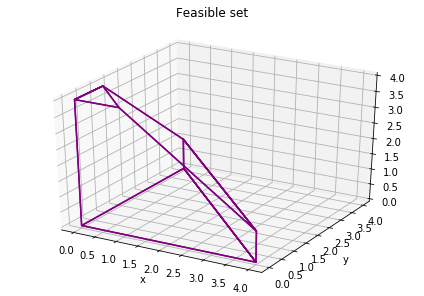

In [72]:
# 3D plot
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.tight_layout()

X = [0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 4, 1, 0, 0, 1]
Y = [0, 4, 0, 0, 0, 1, 4, 4, 0, 0, 4, 0, 0, 0, 1, 0]
Z = np.array([[0, 0, 0, 0, 4, 4, 1, 0, 0, 1, 1, 1, 4, 4, 4, 4], [0, 0, 0, 0, 4, 4, 1, 0, 0, 1, 1, 1, 4, 4, 4, 4]])

ax.plot_wireframe(X, Y, Z, color = 'purple')
plt.title('Feasible set')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Polytope above contains all solutions.     
To find an optimal solution, we will check vertices (because we want to maximize the function, we'll be looking only at the higher values; x and y are multiplied by 2, so we will mainly check the points where x = 4 or y = 4):

f(4,0,0) = 8    
f(0,4,0) = 8       
f(0,1,4) = 6     
f(0,4,1) = 9      
f(4,0,1) = 9     
...

Thus, an optimal solutions are: $(4,0,1)$ where $f(4,0,1) = 9$ and also $(0,4,1)$, $f(0,4,1) = 9$.     


There is also a package in Python called 'pulp' which solves the LP. We can compare our solution with it.

In [76]:
# 'pulp' package solves the LP, so we can compare our solution

#!pip install pulp
from pulp import *

x = pulp.LpVariable("x", lowBound = 0)
y = pulp.LpVariable("y", lowBound = 0)
z = pulp.LpVariable("z", lowBound = 0)
problem = pulp.LpProblem("A simple max problem", pulp.LpMaximize)
problem += 2*x + 2*y + z, "The objective function"
problem += x + y + z <= 5, "1st constraint"
problem += x + y <= 4, "2nd constraint"
problem += z <= 4, "3rd constraint"
problem.solve()
print("Optimal solution:")
for variable in problem.variables():
    print(variable.name, " = ", variable.varValue)
print("Maximum value:")
print(value(problem.objective))

Optimal solution:
x  =  4.0
y  =  0.0
z  =  1.0
Maximum value:
9.0
